Load and See Data

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [6]:
decoded_review = ''.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

In [10]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
from keras import optimizers
from keras import losses

model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

Validate Approach

In [32]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [33]:
history = model.fit(partial_x_train, partial_y_train, batch_size=512, epochs=20, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.1726 - acc: 0.7593 - val_loss: 0.1298 - val_acc: 0.8193
Epoch 2/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0730 - acc: 0.9028 - val_loss: 0.0867 - val_acc: 0.8798
Epoch 3/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0424 - acc: 0.9455 - val_loss: 0.0852 - val_acc: 0.8822
Epoch 4/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0197 - acc: 0.9764 - val_loss: 0.0844 - val_acc: 0.8870
Epoch 5/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0179 - acc: 0.9799 - val_loss: 0.0870 - val_acc: 0.8839
Epoch 6/20
15000/15000 [==============================] - 16s 1ms/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0884 - val_acc: 0.8874
Epoch 7/20
15000/15000 [==============================] - 16s 1ms/step - loss: 8.0268e-04 - acc: 0.9993 - val_loss: 0.0919 - val

In [34]:
large_val_loss = history.history['val_loss']

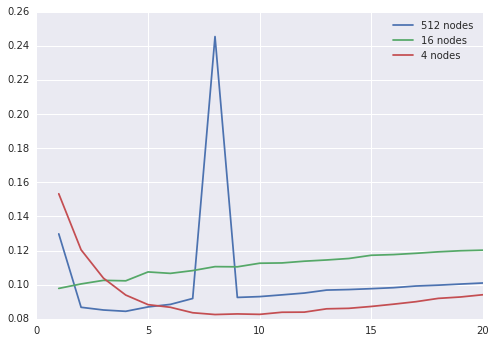

In [37]:
import matplotlib.pyplot as plt

epochs = range(1, len(large_val_loss) + 1)

plt.plot(epochs, large_val_loss, label='512 nodes')
plt.plot(epochs, medium_val_loss, label='16 nodes')
plt.plot(epochs, small_val_loss, label='4 nodes')
plt.legend()

plt.show()

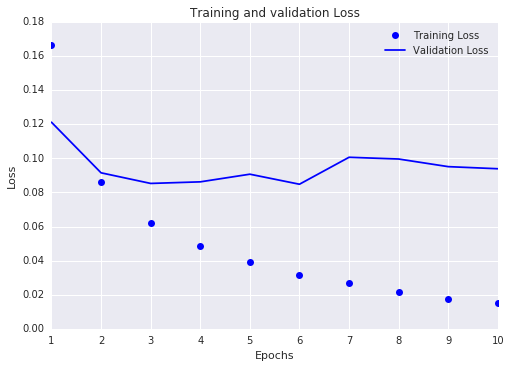

In [20]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

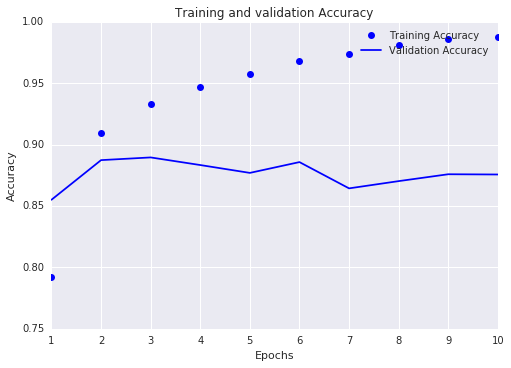

In [21]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

We see maximum at 4 epochs, so we'll train on entire test set with 4 epochs:

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=512, )

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/5
25000/25000 [==============================] - 4s 171us/step - loss: 0.4228 - acc: 0.8303
Epoch 2/5
25000/25000 [==============================] - 4s 140us/step - loss: 0.2332 - acc: 0.9154
Epoch 3/5
25000/25000 [==============================] - 3s 137us/step - loss: 0.1802 - acc: 0.9331
Epoch 4/5
25000/25000 [==============================] - 3s 137us/step - loss: 0.1495 - acc: 0.9453
Epoch 5/5
25000/25000 [==============================] - 3s 119us/step
[0.37396756257534025, 0.86660000000000004]


Compare Different Regularization Techniques

In [41]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

unreg_val_loss = history.history['val_loss']

In [44]:
from keras import regularizers

model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer = regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

l2_reg_val_loss = history.history['val_loss']

In [46]:
model = models.Sequential()

model.add(layers.Dense(16,
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val), verbose=0)

dropout_val_loss = history.history['val_loss']

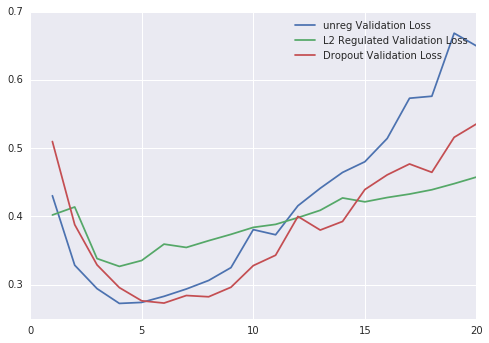

In [47]:
epochs = range(1, len(unreg_val_loss)+1)

plt.plot(epochs, unreg_val_loss, label='unreg Validation Loss')
plt.plot(epochs, l2_reg_val_loss, label='L2 Regulated Validation Loss')
plt.plot(epochs, dropout_val_loss, label='Dropout Validation Loss')
plt.legend()

plt.show()